In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import joblib

In [15]:
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [17]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [18]:
data.shape

(1000, 2)

In [19]:
data.isnull().sum()

,0
Review,0
Liked,0


In [20]:
data['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [21]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [22]:
data['char_count']=data['Review'].apply(len)

In [23]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [24]:
data['word_count']=data['Review'].apply(lambda x :len(str(x).split()))

In [25]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [29]:
data['sent_count']=data['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))

In [30]:
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [31]:
data[data['Liked']==1]['char_count'].mean()

np.float64(55.88)

In [32]:
data[data['Liked']==0]['char_count'].mean()

np.float64(60.75)

In [33]:
import re
data['Review'][1]

'Crust is not good.'

In [34]:
review = re.sub('[^a-zA-Z]',' ',data['Review'][1])
review

'Crust is not good '

In [35]:
review = review.lower()
review

'crust is not good '

In [36]:
review = review.split()
review

['crust', 'is', 'not', 'good']

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
all_stopwords = stopwords.words("english")
all_stopwords.remove('not')
all_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'o

In [39]:
review = [word for word in review if word not in set(all_stopwords)]
review

['crust', 'not', 'good']

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review]
review = " ".join(review)
review

'crust not good'

In [41]:
import re
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [42]:
data['processed_text']=corpus
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


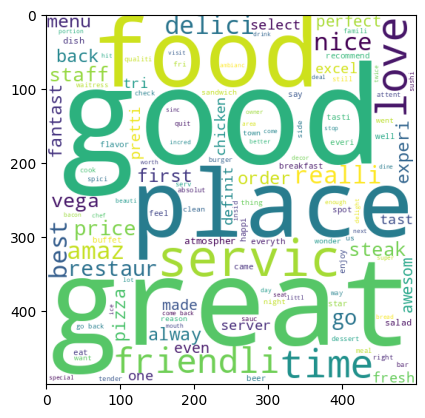

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")
pos = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=" "))
plt.imshow(pos)

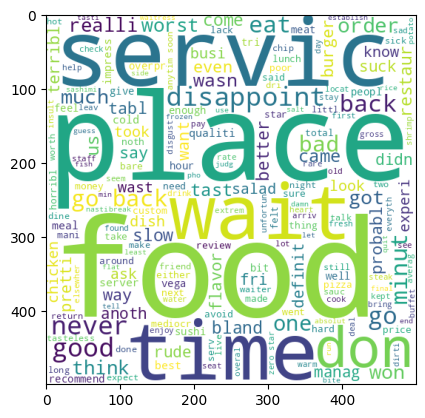

In [44]:
negative = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep=" "))
plt.imshow(negative)
data.head()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
X
X.shape
joblib.dump(cv,"count_v_res")
y = data['Liked']
y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.785

In [46]:
import joblib
joblib.dump(rf,'Restaurant_review_model')

['Restaurant_review_model']

In [47]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

class RestaurantReviewAppCLI:
    def __init__(self):
        # Load pre-trained model and vectorizer
        self.model = joblib.load('Restaurant_review_model')
        self.vectorizer = joblib.load('count_v_res')

    def preprocess_text(self, text):
        custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords

        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)

        return review

    def classify_review(self, user_input):
        if user_input:
            processed_input = self.preprocess_text(user_input)
            processed_input_vectorized = self.vectorizer.transform([processed_input])
            prediction = self.model.predict(processed_input_vectorized)[0]
            sentiment = "Positive" if prediction == 1 else "Negative"
            return f"Predicted Sentiment: {sentiment}"
        else:
            return "Please enter a review."

# Run in console
if __name__ == "__main__":
    app = RestaurantReviewAppCLI()
    while True:
        review = input("Enter your restaurant review (or type 'exit' to quit): ")
        if review.lower() == "exit":
            break
        print(app.classify_review(review))


Enter your restaurant review (or type 'exit' to quit): food is very good
Predicted Sentiment: Positive
Enter your restaurant review (or type 'exit' to quit): food quality is awesome
Predicted Sentiment: Positive
Enter your restaurant review (or type 'exit' to quit): but the curry is not good
Predicted Sentiment: Negative
Enter your restaurant review (or type 'exit' to quit): the biriyani has an excellent taste
Predicted Sentiment: Positive
Enter your restaurant review (or type 'exit' to quit): raita is extremely bad
Predicted Sentiment: Negative
Enter your restaurant review (or type 'exit' to quit): overall , good 
Predicted Sentiment: Positive
Enter your restaurant review (or type 'exit' to quit): exit
